In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
date_list = pd.date_range('2022-09-01', periods=60, freq='D')
date_list

movie_title = []
movie_point = []
movie_date = []


for today in tqdm(date_list):
    url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=" + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), 'html.parser')
    titles = soup.find_all('div', {'class':'tit5'})
    points = soup.find_all('td', {'class':'point'})
    
    titles_text = [] #50
    points_text = [] #50
    date = [] #50
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
     
    movie_title += titles_text
    movie_point += points_text
    movie_date += date
    
frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})

movie_point = pd.pivot_table(frame, index=['title'], aggfunc=np.mean)
movie_point_sort = movie_point.sort_values(by='point' ,ascending=False)
movie_point_sort.head(10)

  0%|          | 0/60 [00:00<?, ?it/s]

,point
title,
탑건: 매버릭,9.770000
인생은 뷰티풀: 비타돌체,9.742653
클라우스,9.698833
할머니의 먼 집,9.626500
극장판 짱구는 못말려: 수수께끼! 꽃피는 천하 떡잎 학교,9.625000
그린 북,9.600000
가버나움,9.590000
밥정,9.585333
아바타 리마스터링,9.550294


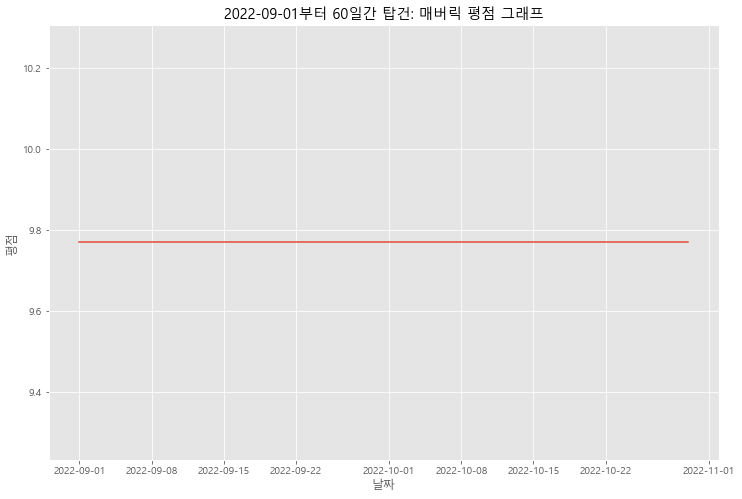

In [2]:
search_movie = frame.query("title == ['탑건: 매버릭']")

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('2022-09-01부터 60일간 탑건: 매버릭 평점 그래프')
plt.plot(search_movie['date'], search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()

탑건 매버릭은 2022년 09월 01일 부터 60일간 평점이 항상 9.77로 유지되었다. 큰 변화는 없었던 것으로 보인다.